Chapter 25
# 不同方式展示二元欧氏距离
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sympy import init_printing, symbols, diff, lambdify, expand, simplify, sqrt
init_printing("mathjax")

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

## 二元函数

In [3]:
x1_array = np.linspace(-2,2,201)
x2_array = np.linspace(-2,2,201)

xx1, xx2 = np.meshgrid(x1_array, x2_array)

In [4]:

def fcn_n_grdnt(A, xx1, xx2):

    x1,x2 = symbols('x1 x2')

    x = np.array([[x1,x2]]).T
    f_x = x.T@A@x
    f_x = f_x[0][0]
    f_x = sqrt(f_x)
    # print(simplify(expand(f_x)))

    #take the gradient symbolically
    grad_f = [diff(f_x,var) for var in (x1,x2)]

    f_x_fcn = lambdify([x1,x2],f_x)
    
    ff_x = f_x_fcn(xx1,xx2)

    #turn into a bivariate lambda for numpy
    grad_fcn = lambdify([x1,x2],grad_f)
    
    xx1_ = xx1[::20,::20]
    xx2_ = xx2[::20,::20]
    
    V = grad_fcn(xx1_,xx2_)

    if isinstance(V[1], int):
        V[1] = np.zeros_like(V[0])

    elif isinstance(V[0], int):
        V[0] = np.zeros_like(V[1])
    
    return ff_x, V


In [5]:
A = np.array([[1, 0],
              [0, 1]])

f2_array, gradient_array = fcn_n_grdnt(A, xx1, xx2)

<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in divide
  return [x1/sqrt(x1**2 + x2**2), x2/sqrt(x1**2 + x2**2)]


### 网格面

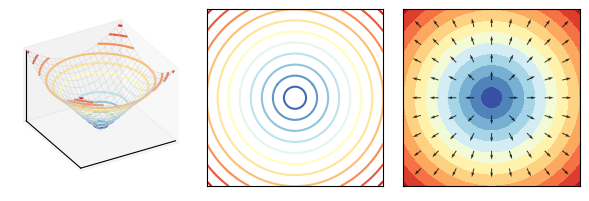

In [6]:
fig = plt.figure(figsize=(6,3))

ax = fig.add_subplot(1, 3, 1, projection='3d')

ax.plot_wireframe(xx1, xx2, f2_array, 
                  rstride=10, cstride=10,
                  color = [0.8,0.8,0.8],
                  linewidth = 0.25)

ax.contour(xx1, xx2, f2_array, 
           levels = 12,
           cmap = 'RdYlBu_r')

# ax.set_xlabel('$x_1$'); ax.set_ylabel('$x_2$')
# ax.set_zlabel('$f(x_1,x_2)$')
ax.set_proj_type('ortho')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.view_init(azim=-120, elev=30)
ax.grid(False)
ax.set_xlim(xx1.min(), xx1.max()); 
ax.set_ylim(xx2.min(), xx2.max())
plt.tight_layout()


ax = fig.add_subplot(1, 3, 2)
ax.contour(xx1, xx2, f2_array, 
           levels = 12,
           cmap = 'RdYlBu_r')

# ax.set_xlabel('$x_1$'); ax.set_ylabel('$x_2$')

ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
ax.grid(False)
ax.set_xlim(xx1.min(), xx1.max()); 
ax.set_ylim(xx2.min(), xx2.max())
plt.tight_layout()


ax = fig.add_subplot(1, 3, 3)

ax.contourf(xx1, xx2, f2_array, 
           levels = 12,
           cmap = 'RdYlBu_r')

xx1_ = xx1[::20,::20]
xx2_ = xx2[::20,::20]
plt.quiver (xx1_, xx2_, gradient_array[0], gradient_array[1],
            angles='xy', scale_units='xy',
            edgecolor='none', alpha=0.8)

# ax.set_xlabel('$x_1$'); ax.set_ylabel('$x_2$')

ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
ax.grid(False)
ax.set_xlim(xx1.min(), xx1.max()); 
ax.set_ylim(xx2.min(), xx2.max())
plt.tight_layout()

fig.savefig('Figures/test.svg', format='svg')